In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}

In [2]:
#Matriz de acoplamiento

def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 
   

[[ -8.   1.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   1.   1.   0.   1.   1.   1.]
 [  1.  -7.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   1.   0.   1.   1.   0.   0.   0.   0.   0.   1.]
 [  1.   1.  -9.   1.   1.   0.   1.   0.   0.   1.   0.   0.   0.   1.
    0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   1.   1.  -8.   1.   1.   0.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   1.   0.   1.   1.   0.   0.   0.]
 [  0.   0.   1.   1.  -6.   1.   1.   0.   0.   0.   0.   0.   0.   0.
    0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   1.   1.  -8.   1.   1.   0.   0.   1.   0.   0.   0.
    0.   0.   1.   0.   0.   0.   1.   0.   1.   0.   0.]
 [  1.   0.   1.   0.   1.   1.  -9.   1.   1.   0.   0.   0.   0.   0.
    1.   0.   0.   0.   0.   0.   1.   0.   0.   1.   0.]
 [  0.   0.   0.   1.   0.   1.   1.  -8.   1.   1.   0.   1.   0.   0.
    0.   0.   1.  

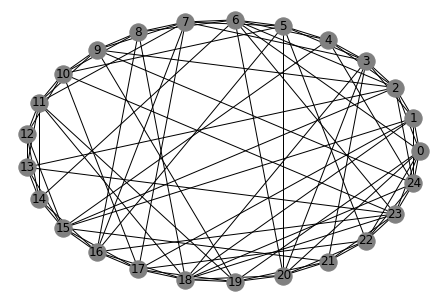

Los valores propios son:
[4.440892098500626e-15, -2.702686541591193, -3.788708006544415, -4.352193226105295, -4.998739739579999, -5.477981629448575, -5.744739743643776, -5.8055058682428555, -6.30148712479792, -6.640329273568419, -6.798210970153511, -7.246278340826021, -7.571673507818759, -7.871581472313481, -8.179830474576013, -8.551835242720108, -9.287654225176976, -9.566532645827499, -9.66913696497076, -10.172643740070276, -10.282240354576723, -11.093665826926372, -11.286222521242596, -12.105357988397923, -12.504764570880464]
El valor propio Lamda2 es:
-2.702686541591193
El valor propio LamdaN es:
-12.504764570880464
El valor del eingratio de la red es:
4.626790557634681


In [19]:
n, k = 25, 2
p = 0.9
G = nx.newman_watts_strogatz_graph(n,2*k,p)
clustering = nx.algorithms.average_clustering(G)
shorestPath = nx.average_shortest_path_length(G)
ma = matriz_acoplaminento(G)
#ma = -nx.laplacian_matrix(G).toarray()
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
print(ma)
print("El coeficiente de agrupamiento es:",clustering)
print("El promedio del camino mas corto es:",shorestPath)

nx.draw_circular(G,**opts)
plt.show()


#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valor propio Lamda2 es:")
print(vp[1])

print("El valor propio LamdaN es:")
print(vp[n-1])

#Calculo del metodo eingratio para sincronizabilidad
eingratio = vp[n-1]/vp[1]
print("El valor del eingratio de la red es:")
print(eingratio)